In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
df = pd.read_csv('Admission SAT.csv')
df.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [6]:
df.shape


(168, 2)

### CONFIDENCE INTERVAL

FOR 95% CONFIDENCE

X(+,-)ta/2*(std_pop/n)

where n= sample size,x is sample mean,Za/2 =1.95 (with 95%),std_pop=population std


σ: the population standard deviation (which we don't know, so we use the sample standard deviation instead)

t_alpha=t_value=1+conf_level/2

t_value = t.ppf((1 + conf_level) / 2, df=len(sample) - 1)


<AxesSubplot:xlabel='SAT', ylabel='Count'>

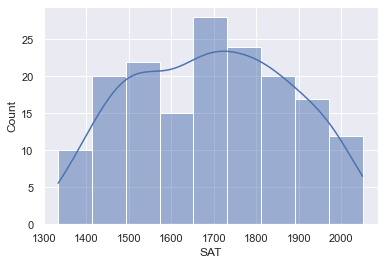

In [15]:
sns.histplot(x=df.SAT,kde=True)

###### ddof=1, This gives us an unbiased estimate of the population SEM when working with a small sample.

In [22]:
import numpy as np
from scipy.stats import t



Confidence interval:  (95.0, SAT    1667.396662
dtype: float64, SAT    1723.150957
dtype: float64)


### Calculate the sample mean and standard deviation

In [30]:

sample = df
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)#because there is no population std 

print("Sample standard deviation: ",(sample_std))
print("Sample mean: ",sample_mean)

Sample standard deviation:  SAT    183.019017
dtype: float64
Sample mean:  SAT    1695.27381
dtype: float64


### Calculate the t_value

## t_value

###### t = (x̄ - μ) / (s / sqrt(n))

where:

x̄ is the sample mean
μ is the hypothesized population mean
s is the standard deviation of the sample
n is the sample size

The t-value represents the number of standard errors that the sample mean is away from the hypothesized population mean

In [33]:
# Set the desired confidence level (e.g., 95%)
conf_level = 0.95

# Calculate the t-value based on the sample size and degrees of freedom
t_value = t.ppf((1 + conf_level) / 2, df=len(sample) - 1)
print("t_value:",t_value)

t_value: 1.9742709570223844


### Calculate the lower and upper bounds of the confidence interval

In [34]:


lower_bound = sample_mean - t_value * (sample_std / np.sqrt(len(sample)))
upper_bound = sample_mean + t_value * (sample_std / np.sqrt(len(sample)))


In [35]:

print("Confidence interval: ",( lower_bound, upper_bound))

Confidence interval:  (SAT    1667.396662
dtype: float64, SAT    1723.150957
dtype: float64)


This means that we are 95% confident that the true population mean SAT of  students is between 1667.396662 and 1723.150957 . In other words, if we were to repeat the sampling process many times and construct a 95% confidence interval each time, we would expect 95% of these intervals to contain the true population mean height.

It's important to note that this doesn't mean that we are 95% confident that the true population mean weight falls within the particular interval [1667.396662 and 1723.150957]. Instead, it means that if we were to repeat the sampling process many times and construct a confidence interval for each sample, about 95% of those intervals would contain the true population mean weight.

If the hypothesized parameter is outside the confidence interval, then we can reject the null hypothesis and conclude that the sample statistic is significantly different from the hypothesized value.

## BY SCIPY

In [37]:
import scipy.stats as st

In [42]:
st.t.interval(alpha=0.90, df=len(df)-1,loc=np.mean(df.SAT),scale=st.sem(df.SAT))

(1671.918548230096, 1718.6290708175231)

In [50]:
df

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


## creating samples of 50:

### the  graphs

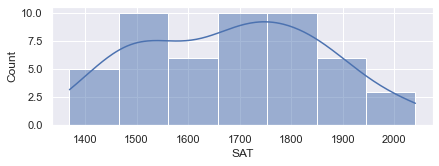

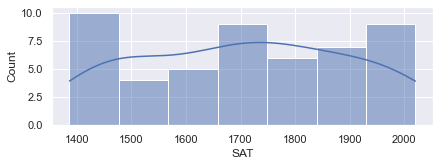

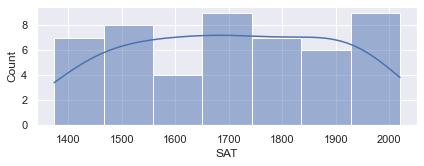

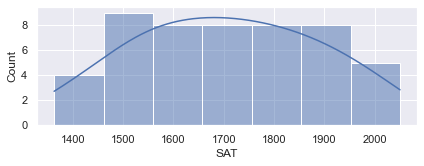

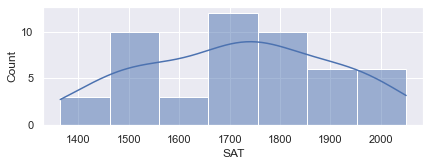

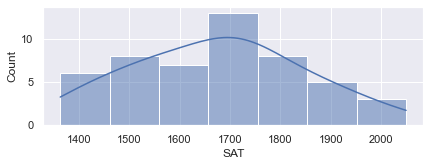

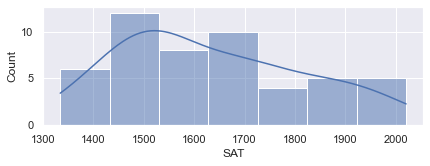

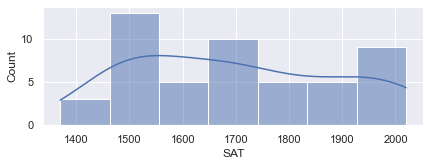

In [64]:
for i in range(1,9):
    plt.figure(figsize=(15,10))
    plt.subplot(4,2,i)
    
    shuffle_index = np.random.permutation(df.index)
    #print(shuffle_index)
    temp_df = df.loc[shuffle_index]
    temp_df=temp_df[:50]
    sns.histplot(x=temp_df.SAT,kde=True)


### the intervals for 9 samples :
not that these are different samples from graphs

In [75]:
for i in range(10):
    shuffle_index = np.random.permutation(df.index)
    temp_df = df.loc[shuffle_index]
    sample = temp_df[:50]
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    conf_level = 0.95
    t_value = t.ppf((1 + conf_level) / 2, df=len(sample) - 1)
    print("t_value:",t_value)
    lower_bound = sample_mean - t_value * (sample_std / np.sqrt(len(sample)))
    upper_bound = sample_mean + t_value * (sample_std / np.sqrt(len(sample)))

    print("Confidence intervals: ")
    print("lower_bound",lower_bound)
    print("upper_bound",upper_bound)
    print("*******")
    print("Sample standard deviation: ",sample_std)
    print("Sample mean: ",sample_mean)
    print("---------------------------------------------------------")

t_value: 2.009575234489209
Confidence intervals: 
lower_bound SAT    1669.984369
dtype: float64
upper_bound SAT    1779.335631
dtype: float64
*******
Sample standard deviation:  SAT    192.386474
dtype: float64
Sample mean:  SAT    1724.66
dtype: float64
---------------------------------------------------------
t_value: 2.009575234489209
Confidence intervals: 
lower_bound SAT    1654.385344
dtype: float64
upper_bound SAT    1756.814656
dtype: float64
*******
Sample standard deviation:  SAT    180.208383
dtype: float64
Sample mean:  SAT    1705.6
dtype: float64
---------------------------------------------------------
t_value: 2.009575234489209
Confidence intervals: 
lower_bound SAT    1657.057507
dtype: float64
upper_bound SAT    1766.702493
dtype: float64
*******
Sample standard deviation:  SAT    192.903237
dtype: float64
Sample mean:  SAT    1711.88
dtype: float64
---------------------------------------------------------
t_value: 2.009575234489209
Confidence intervals: 
lower_bound 